In [1]:
!pip install prophet

In [10]:
# Python
import pandas as pd
from prophet import Prophet


In [19]:
# Python
df = pd.read_csv('../data/crypto.csv',names=["date", "open", "high", "low", "close", "volume", "ticker"])
df.head()

,date,open,high,low,close,volume,ticker
0,2022-10-30,20749.98,20749.98,20676.4,20676.4,2.770231e+10,BTC/USD
1,2022-10-26,20105.00,20170.00,20077.0,20143.0,5.776770e+05,BTC/USD
2,2022-10-25,19339.00,20432.00,19251.0,20104.0,5.544651e+07,BTC/USD
3,2022-10-24,19586.00,19615.00,19174.0,19340.0,2.537289e+07,BTC/USD
4,2022-10-23,19219.00,19707.00,19086.0,19585.0,2.971904e+07,BTC/USD


In [27]:
prophet_df=pd.DataFrame()
# newdf=df[df['ticker']=="BTC/USD"]
prophet_df[["ds","y"]] = df[["date","close"]]


In [28]:
m = Prophet()
m.fit(prophet_df)

18:11:49 - cmdstanpy - INFO - Chain [1] start processing
18:11:50 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
2844,2022-11-26
2845,2022-11-27
2846,2022-11-28
2847,2022-11-29
2848,2022-11-30


In [30]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2819,2022-11-01,4869.247361,-7917.666220,18712.173440
2820,2022-11-02,4839.308894,-9496.514677,18627.079067
2821,2022-11-03,4787.078253,-8662.712226,18715.821698
2822,2022-11-04,4754.581688,-8893.010699,17553.984776
2823,2022-11-05,4730.514572,-8260.026946,18058.840818
2824,2022-11-06,4703.704008,-8761.445885,17996.336941
2825,2022-11-07,4671.129719,-8453.927140,18309.668153
2826,2022-11-08,4637.481509,-8897.224251,18736.551050
2827,2022-11-09,4607.657586,-9330.049056,19251.961500
2828,2022-11-10,4557.470856,-10123.118711,17073.163689


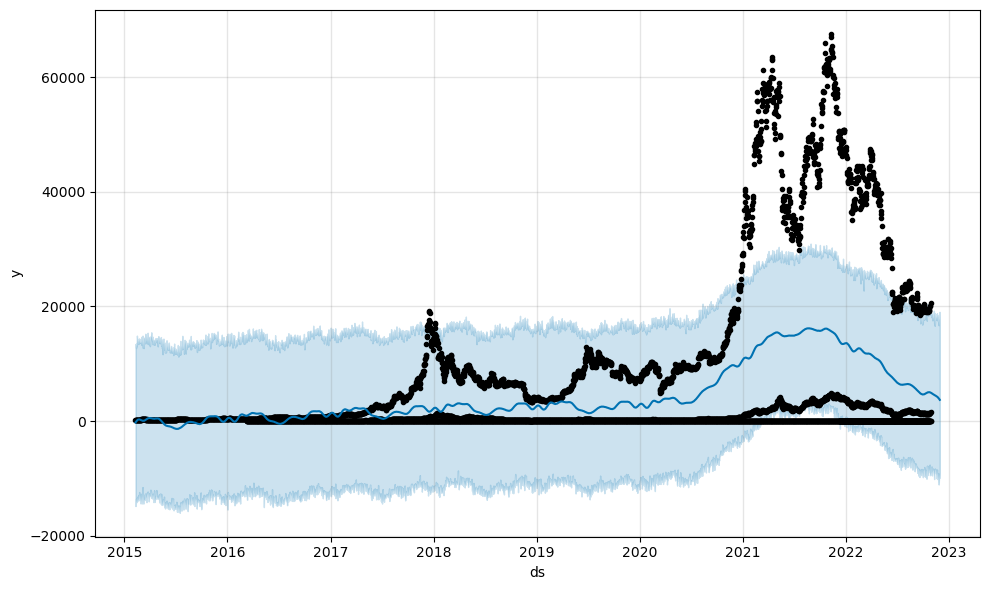

In [31]:
# Python
fig1 = m.plot(forecast)


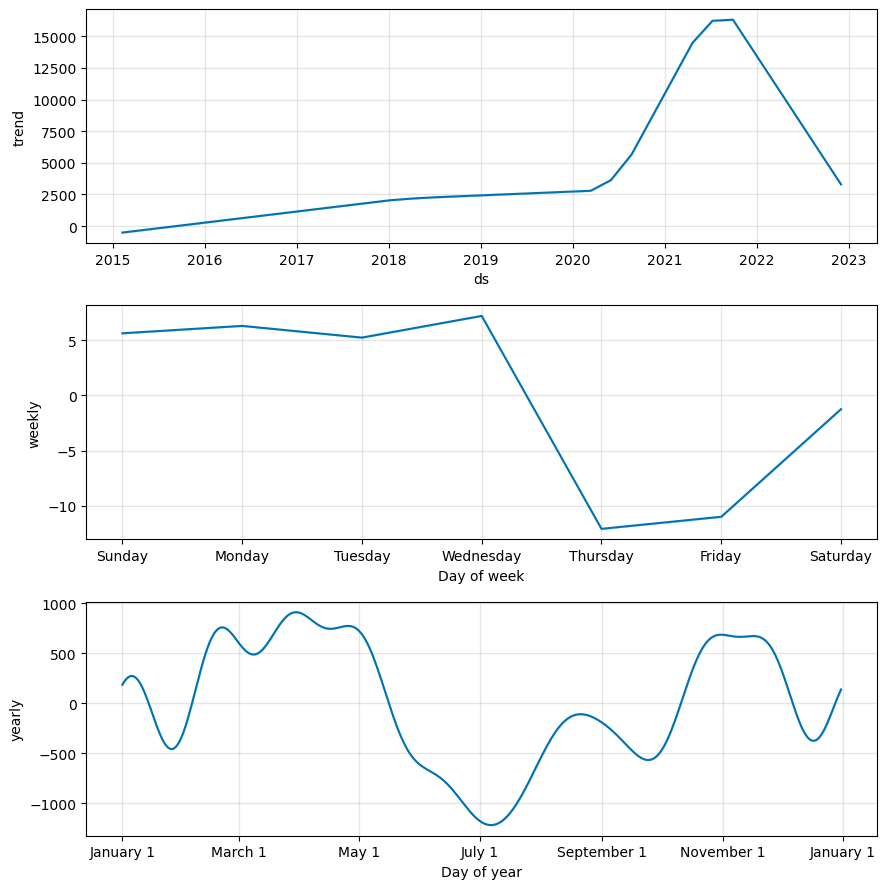

In [32]:
# Python
fig2 = m.plot_components(forecast)


In [33]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [34]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selec